# 2024 날씨 빅데이터 콘테스트 

## 전력 분야 - 기상에 따른 공동주택 전력수요 예측 개선 

In [20]:
import pandas as pd
import os 

import warnings
warnings.filterwarnings(action='ignore')

In [21]:
df = pd.read_csv('./data/electric_train_cp949.csv', encoding='cp949', index_col=0)
df['electric_train.tm'] = pd.to_datetime(df['electric_train.tm'])

print(df.shape)

(7593355, 16)


In [22]:
df.head()

,electric_train.num,electric_train.tm,electric_train.hh24,electric_train.n,electric_train.stn,electric_train.sum_qctr,electric_train.sum_load,electric_train.n_mean_load,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi,electric_train.weekday,electric_train.week_name,electric_train.elec
1,4821,2021-01-01 01:00:00,1,11,884,6950,751.32,68.606449,2.2,62.7,1.8,0.0,-1.0,4,0,99.56
2,4821,2021-01-01 02:00:00,2,11,884,6950,692.60,68.606449,2.3,63.1,2.1,0.0,-0.6,4,0,91.78
3,4821,2021-01-01 03:00:00,3,11,884,6950,597.48,68.606449,2.2,62.4,2.5,0.0,-1.3,4,0,79.17
4,4821,2021-01-01 04:00:00,4,11,884,6950,553.48,68.606449,1.7,63.5,1.7,0.0,-0.2,4,0,73.34
5,4821,2021-01-01 05:00:00,5,11,884,6950,526.24,68.606449,1.7,63.0,1.6,0.0,-0.8,4,0,69.73


전력 데이터 

![image](https://github.com/khw11044/csv_dataset/assets/51473705/83b214a1-8661-465b-b176-6912d867f856)

기상 데이터 

![image](https://github.com/khw11044/csv_dataset/assets/51473705/cc9f5973-b068-4c77-812a-dc68160cd285)

In [25]:
elec_cols = ['electric_train.'+ a for a in ['tm', 'hh24', 'weekday', 'week_name', 'sum_qctr', 'n', 'sum_load', 'n_mean_load', 'elec']]

weat_cols = ['electric_train.'+ a for a in ['num', 'stn', 'nph_ta', 'nph_hm', 'nph_ws_10m', 'nph_rn_60m', 'nph_ta_chi']]

reset_order_cols = elec_cols + weat_cols

df_new = df[reset_order_cols]
colunms = {}
for col in reset_order_cols:
    colunms[col] = col.split('.')[1]

df_new = df_new.rename(columns=colunms)

df_new.head()

,tm,hh24,weekday,week_name,sum_qctr,n,sum_load,n_mean_load,elec,num,stn,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi
1,2021-01-01 01:00:00,1,4,0,6950,11,751.32,68.606449,99.56,4821,884,2.2,62.7,1.8,0.0,-1.0
2,2021-01-01 02:00:00,2,4,0,6950,11,692.60,68.606449,91.78,4821,884,2.3,63.1,2.1,0.0,-0.6
3,2021-01-01 03:00:00,3,4,0,6950,11,597.48,68.606449,79.17,4821,884,2.2,62.4,2.5,0.0,-1.3
4,2021-01-01 04:00:00,4,4,0,6950,11,553.48,68.606449,73.34,4821,884,1.7,63.5,1.7,0.0,-0.2
5,2021-01-01 05:00:00,5,4,0,6950,11,526.24,68.606449,69.73,4821,884,1.7,63.0,1.6,0.0,-0.8


![image](https://github.com/khw11044/csv_dataset/assets/51473705/c212e653-dcdc-49b3-bf75-ea356c7db0df)

## **전력기상지수** 

기상변화에 따른 지역별 공동주택의 예상되는 전력수요 변화를 기상예보처럼 국민들이 쉽게 인지할 수 있도록 수치화하여 최대 72h 예측해주는 서비스 

### **산출식**
해당지역 (5km x 5km) 공동주택의 연중 평균부하를 100으로 하였을 때, 특정시각의 전력수요 또는 예상전력수요를 상대비율로 표현한 값 

$\text{A격자 00시간의 전력기상지수} = \frac{A격자 00시각의 전력수요 (또는 예상 전력수요)}{A격자 해당년도 전시간 평균 전력수요}$

$\text{elec}_{i} = \frac{\text{(sum load)}_{i}}{\text{(All mean load for a year)}}$

### **활용법**

전일 또는 지난주 대비 지수의 증감비율을 통해 전력수요 변화량 예상 

**예시)** 
- 전일 최고 전력기상지수가 100, 
- 당일 최고 전력기상지수가 125,
- 당일 최대수요는 전일대비 125/100 = 1.25배 (25%) 증가를 예상해 활용 


$\text{당일 최대수요 증감소율}_{i} = \frac{\text{당일 최고 전력기상지수}(\text{max}(elec_{i}))}{\text{전일 최고 전력기상지수}(\text{max}(elec_{i-1}))}$

- elec : 전력기상지수 
- sum_qctr : 계약전력합계        = 해당격자의 전력통계 산출에 포함된 공동주택의 계약전력 합계 
- n : 공동주택 수                = 해당격자의 전력통계 산출에 포함된 공동주택의 수, 단위(단자)
- sum_load : 전력수요 합계       = 해당격자/시각에 측정된 공동주택의 전력수요 합계 
- n_mean_load : 전력부하량 평균  = 격자내 총 전력부하량을 아파트 수로 나누어 격자의 평균 부하량을 산출

$ \text{n\_mean\_load} = \text{sum\_load} \div \text{n}$

### **검증 데이터**
**검증 데이터**는 전력기상지수를 산출할 수 있는 변수인 sum_qctr(계약전력합계), n(공동주택 수), sum_load(전력수요 합계), n_mean_load(전력부하량 평균)를 제외하고 제공 

$\text{elec}_{i} = \frac{\text{(sum load)}_{i}}{\text{(n mean load)}_{i-1}}$


즉, elec(전력기상지수, 예측대상)를 구하려면, 해당격자의 해당시간 전력 수요(sum_load)를 알아야하고, 해당년도의 전체 시간 평균 전력 수요를 알아야 한다

## **목표**
공동주택 전력수요 예측 

1. 공공데이터를 활용하여 공동주택 전력수요 증감 영향 요인 분석 
2. 계절, 지역에 따른 모델 세분화를 통한 공동주택 전력 수요 예측 (전력기상지수(electric_train.elec)) 최적모델 개발 

## -------------

### AWS 넘버별 지역이 같다 라는 추측 증명 

같은 AWS 넘버별 지역은 온도와 습도등 기상 기록이 같을 것이다.

In [26]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


In [28]:
df_2021 = df_new[df_new['tm'].dt.year == 2021]

In [34]:
stn_nums = []
most = 0
for stn in df_2021['stn'].unique():
    
    nums_num = len(df_2021[df_2021['stn']==stn]['num'].unique())
    stn_nums.append([stn,nums_num])
    

stn_nums.sort(key=lambda x:x[1],reverse=True)

print(stn_nums)

[[846, 6], [133, 5], [541, 5], [937, 4], [899, 4], [152, 4], [146, 4], [827, 4], [138, 4], [279, 4], [493, 4], [617, 4], [550, 4], [119, 4], [565, 4], [572, 4], [511, 4], [168, 3], [162, 3], [788, 3], [908, 3], [783, 3], [255, 3], [253, 3], [941, 3], [940, 3], [143, 3], [636, 3], [371, 3], [445, 3], [114, 3], [546, 3], [404, 3], [428, 3], [450, 3], [532, 3], [184, 2], [165, 2], [774, 2], [313, 2], [710, 2], [950, 2], [904, 2], [942, 2], [156, 2], [192, 2], [673, 2], [939, 2], [257, 2], [864, 2], [860, 2], [702, 2], [840, 2], [140, 2], [845, 2], [824, 2], [822, 2], [642, 2], [496, 2], [131, 2], [327, 2], [693, 2], [129, 2], [551, 2], [127, 2], [545, 2], [512, 2], [434, 2], [590, 2], [112, 2], [649, 2], [376, 2], [543, 2], [433, 2], [427, 2], [589, 2], [506, 2], [599, 2], [353, 2], [101, 2], [884, 1], [330, 1], [261, 1], [294, 1], [712, 1], [713, 1], [266, 1], [907, 1], [917, 1], [708, 1], [722, 1], [159, 1], [155, 1], [938, 1], [974, 1], [252, 1], [923, 1], [247, 1], [288, 1], [245, 1],

In [35]:
df_temp = df_2021[df_2021['stn']==846]

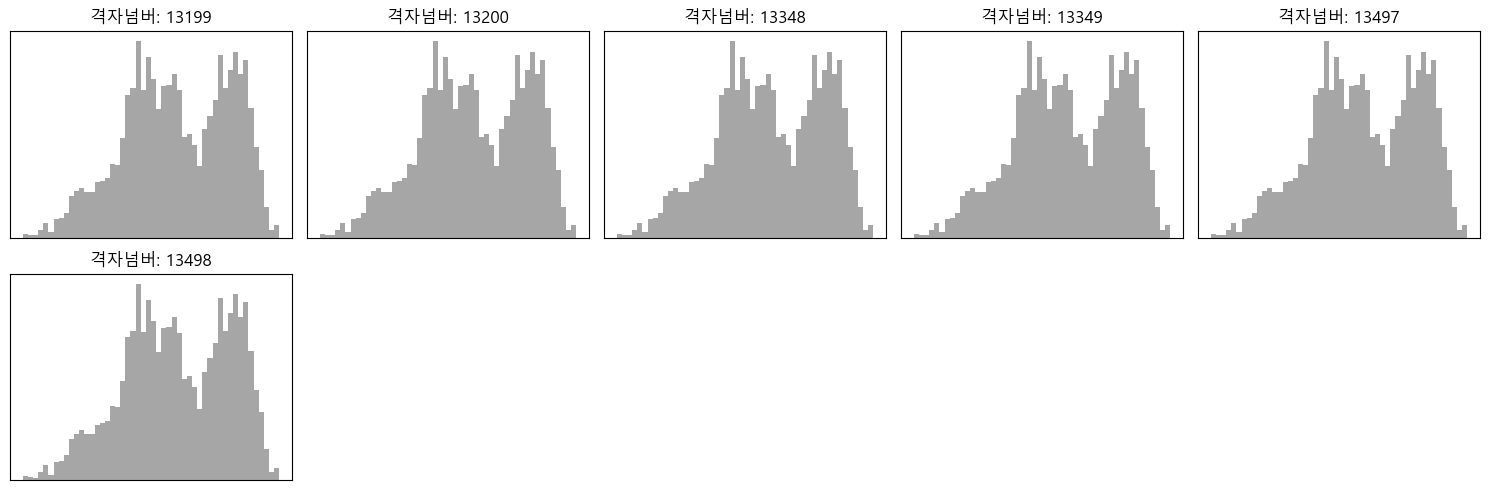

In [36]:

fig = plt.figure(figsize = (15, 5))
for idx, num in enumerate(df_temp['num'].unique()):
    ax = plt.subplot(2, 5, 1+idx)
    energy = df_temp['nph_ta'].values

    plt.hist(energy, alpha = 0.7, bins = 50, color = 'gray')
    
    num = df_temp['num'].unique()[idx]
    plt.title(f'격자넘버: {num}')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('')
    plt.ylabel('')
    
plt.tight_layout()
plt.show()

In [38]:
check_cols = ['stn', 'nph_ta', 'nph_hm', 'nph_ws_10m', 'nph_rn_60m', 'nph_ta_chi']

df_temp[(df_temp['num']==13199) & (df_temp.tm=='2021-01-01 01:00:00')][check_cols].iloc[:2]

,stn,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi
2121912,846,2.3,62.4,5.3,0.0,-7.2


In [39]:
df_temp[(df_temp['num']==13200) & (df_temp.tm=='2021-01-01 01:00:00')][check_cols].iloc[:2]

,stn,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi
2148216,846,2.3,62.4,5.3,0.0,-7.2


In [40]:
df_temp[(df_temp['num']==13348) & (df_temp.tm=='2021-01-01 01:00:00')][check_cols].iloc[:2]

,stn,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi
2306040,846,2.3,62.4,5.3,0.0,-7.2


## Pre-processing & EDA

In [42]:
df_new['year'] = df_new['tm'].dt.year
df_new['month'] = df_new['tm'].dt.month
df_new['day'] = df_new['tm'].dt.day
df_new = df_new.sort_values(by='tm')

# 시즌을 결정하는 함수
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# 'season' 컬럼 추가
df_new['season'] = df_new['tm'].dt.month.apply(get_season)
df_new['season'] = df_new['season'].map({'Spring':0, 'Summer':1, 'Fall':2, 'Winter':3})

# 공휴일을 주말 카테고리에 추가
from pytimekr import pytimekr
kr_holidays_2021 = pytimekr.holidays(year=2021)
kr_holidays_2022 = pytimekr.holidays(year=2022)
kr_holidays_2023 = pytimekr.holidays(year=2023)

df_new.loc[df_new['tm'].isin(kr_holidays_2021),'week_name']=1
df_new.loc[df_new['tm'].isin(kr_holidays_2022),'week_name']=1
df_new.loc[df_new['tm'].isin(kr_holidays_2023),'week_name']=1

# 시간의 연속성 추가
# ## sin cos 함수를 이용한 시간의 연속적 표현 (cyclical time encoding)
import numpy as np
df_new['sin_time'] = np.sin(2*np.pi*df_new.hh24/24)
df_new['cos_time'] = np.cos(2*np.pi*df_new.hh24/24)

# THI(불쾌지수) & CDH(Cooling Degree Hour) 변수 추가
df_new['THI'] = 9/5*df_new['nph_ta'] - 0.55*(1-df_new['nph_hm']/100)*(9/5*df_new['nph_hm']-26)+32
def CDH(xs):
    ys = []
    for i in range(len(xs)):
        if i < 11:
            ys.append(np.sum(xs[:(i+1)]-26))        # 26도 
        else:
            ys.append(np.sum(xs[(i-11):(i+1)]-26))
    return np.array(ys)

df_new['CDH'] = 0
cdhs = np.array([])
for num in df_new['num'].unique():                   # 격자별 불쾌지수 
    temp = df_new[df_new['num'] == num]
    cdh = CDH(temp['nph_ta'].values)
    df_new.loc[df_new['num'] == num, 'CDH'] = cdh

cols_for_test = [
        'tm', 'year', 'season', 'month','day', 'hh24', 'weekday','week_name', 'sin_time', 'cos_time',
        'num',
        'stn', 'nph_ta','nph_hm', 'CDH', 'THI',
        'nph_ws_10m', 'nph_rn_60m', 'nph_ta_chi', 
       'elec']

df_train = df_new[cols_for_test]

df_train.head()

C:\Users\kim_h\AppData\Local\Temp\ipykernel_6408\1157259303.py:27: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_new.loc[df_new['tm'].isin(kr_holidays_2021),'week_name']=1
C:\Users\kim_h\AppData\Local\Temp\ipykernel_6408\1157259303.py:28: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_new.loc[df_new['tm'].isin(kr_holidays_2022),'week_name']=1
C:\Users\kim_h\AppData\Local\Temp\ipykernel_6408\1157259303.py:29: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered mat

,tm,year,season,month,day,hh24,weekday,week_name,sin_time,cos_time,num,stn,nph_ta,nph_hm,CDH,THI,nph_ws_10m,nph_rn_60m,nph_ta_chi,elec
2647991,2020-01-01 01:00:00,2020,3,1,1,1,2,0,0.258819,0.965926,13615,140,-8.5,74.5,-34.5,1.538975,0.9,0.0,-5.8,99.63
6576212,2020-01-01 01:00:00,2020,3,1,1,1,2,0,0.258819,0.965926,18837,569,-3.5,22.8,-29.5,19.314016,1.0,0.0,-5.6,98.77
6602516,2020-01-01 01:00:00,2020,3,1,1,1,2,0,0.258819,0.965926,18838,428,-2.3,21.2,-28.3,22.589856,0.7,0.0,-6.1,99.56
543649,2020-01-01 01:00:00,2020,3,1,1,1,2,0,0.258819,0.965926,10824,950,2.9,67.8,-23.1,20.211316,1.1,0.0,-5.9,98.32
6628820,2020-01-01 01:00:00,2020,3,1,1,1,2,0,0.258819,0.965926,18870,106,-1.8,25.5,-27.8,20.605975,3.9,0.0,-6.3,101.20


### 이상치 처리

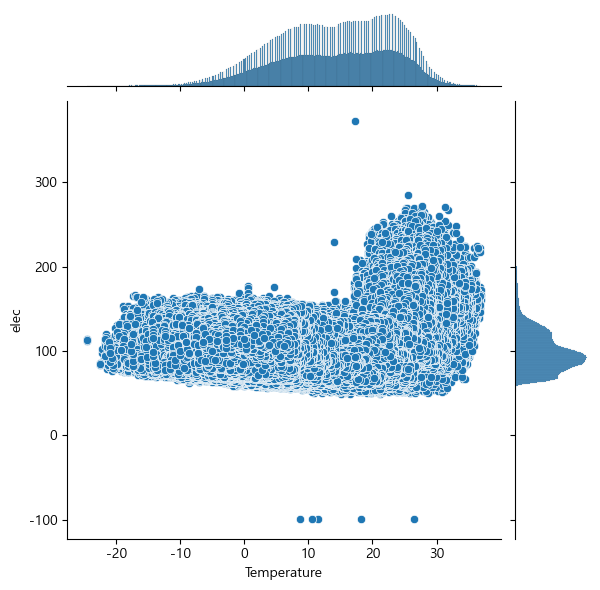

In [44]:
import seaborn as sns

# 온도별 elec에서 elec 이상치 발견
graph = sns.jointplot(x=df_train['nph_ta'], y=df_train['elec'], kind='scatter')
graph.set_axis_labels(xlabel='Temperature', ylabel='elec')
plt.show()

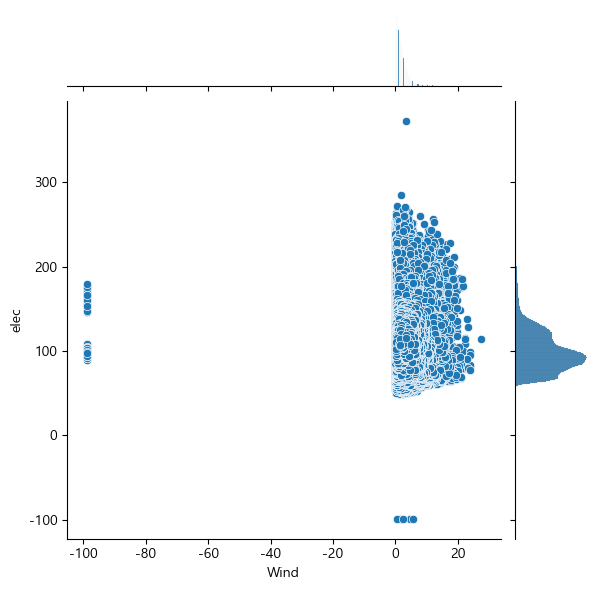

In [45]:
# 풍속별 elec에서 풍속 이상치 발견
graph = sns.jointplot(x=df_train['nph_ws_10m'], y=df_train['elec'], kind='scatter')
graph.set_axis_labels(xlabel='Wind', ylabel='elec')
plt.show()

In [46]:
# 온도별 elec의 이상치 처리 
for idx in list(df_train.loc[df_train['elec'] < 0, 'nph_ta'].index):
    area_num = df_train.loc[idx]['num']
    season = df_train.loc[idx]['season']
    year = df_train.loc[idx]['year']
    temp = df_train.loc[idx]['nph_ta']
    df_train.loc[idx, 'elec'] = \
        df_train.loc[(df_train.loc[idx]['num'] == area_num) & (df_train.loc[idx]['year'] == year) & (df_train.loc[idx]['season'] == season) & (df_train['nph_ta'] == temp), :]['elec'].mean()
        # 해당 지역의 해당 연도의 해당 시즌의 해당 온도와 같은 날의 elec의 평균

In [47]:
# 풍속이 음수인 값을 갖는 이상치 처리

ano_list = list(df_train.loc[df_train['nph_ws_10m'] < 0, 'nph_ws_10m'].index)
for idx in ano_list:
    pre_idx = idx - 1
    nex_idx = idx + 1

    previous_value = df_train.loc[pre_idx, 'nph_ws_10m']
    next_value = df_train.loc[nex_idx, 'nph_ws_10m']
    mean_val = (previous_value + next_value) / 2
    df_train.loc[idx, 'nph_ws_10m'] = mean_val

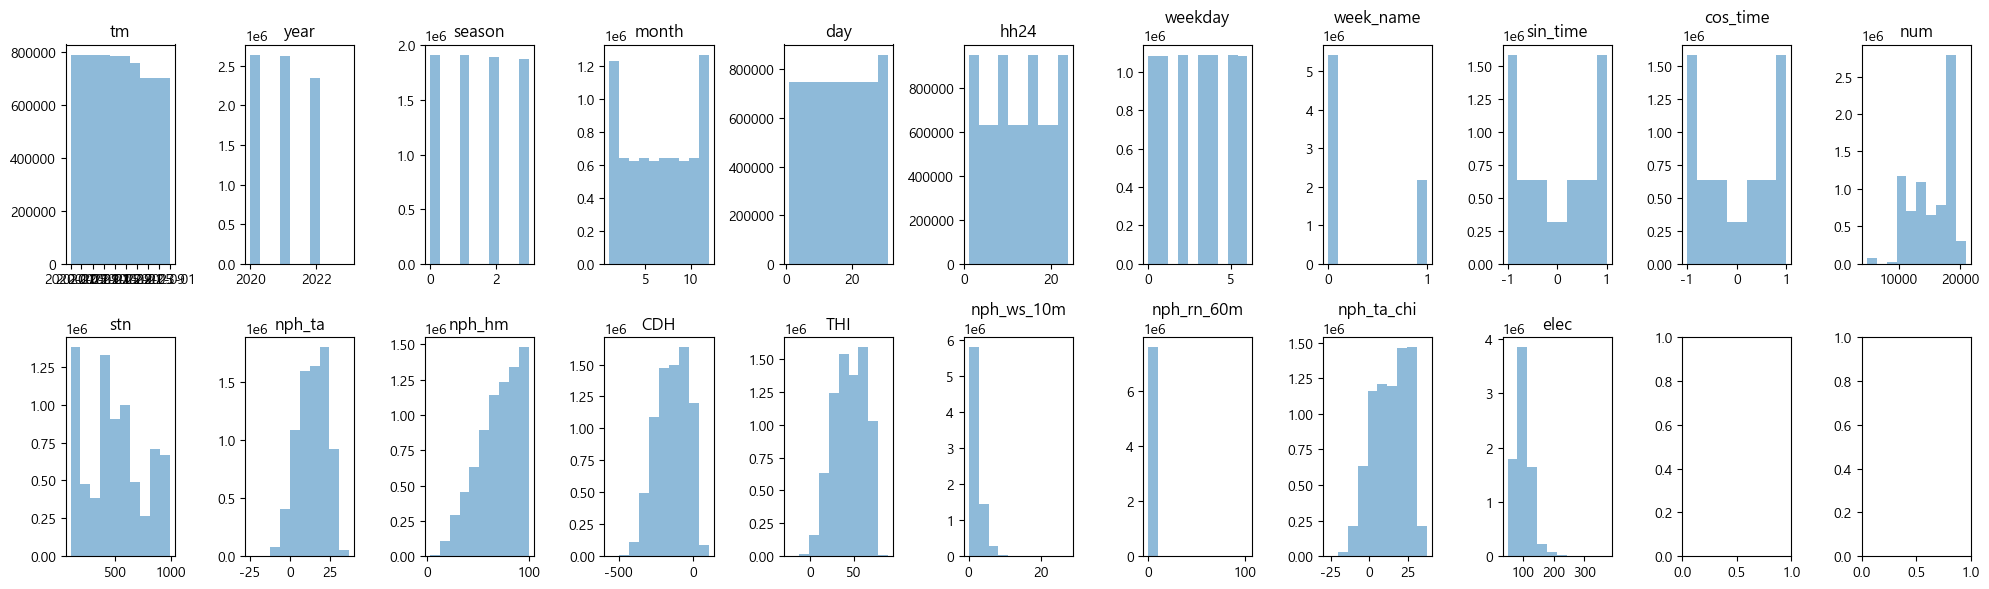

In [48]:
## plot feature data distribution

fig, ax = plt.subplots(2, df_train.shape[1]//2+1, figsize=(20, 6))
for idx, feature in enumerate(df_train.columns):
    data = df_train[feature]
    if idx<df_train.shape[1]//2 + 1:
        ax[0,idx].hist(df_train.iloc[:,idx], bins=10, alpha=0.5)
        ax[0,idx].set_title(df_train.columns[idx])
    else:
        ax[1,idx-df_train.shape[1]//2-1].hist(df_train.iloc[:,idx], bins=10, alpha=0.5)
        ax[1,idx-df_train.shape[1]//2-1].set_title(df_train.columns[idx])
        
plt.tight_layout()
plt.show()

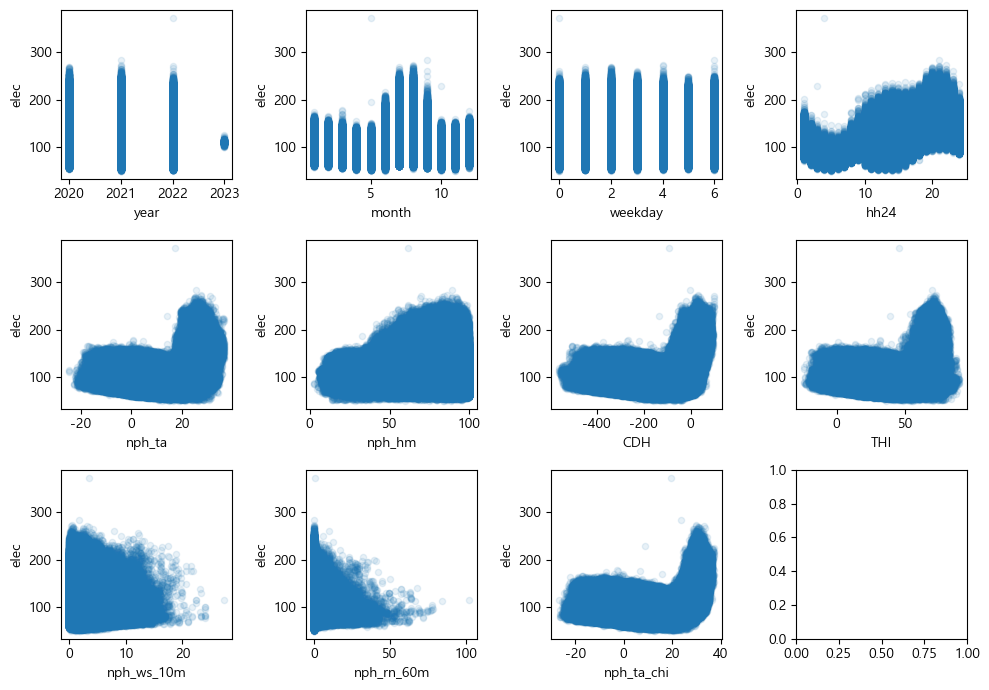

In [49]:
## chk feature correlation visually

fig, axes = plt.subplots(3, 4, figsize=(10,7))
df_train.plot(x='year', y='elec', kind='scatter', alpha=0.1, ax=axes[0,0])
df_train.plot(x='month', y='elec', kind='scatter', alpha=0.1, ax=axes[0,1])
df_train.plot(x='weekday', y='elec', kind='scatter', alpha=0.1, ax=axes[0,2])
df_train.plot(x='hh24', y='elec', kind='scatter', alpha=0.1, ax=axes[0,3])

df_train.plot(x='nph_ta', y='elec', kind='scatter', alpha=0.1, ax=axes[1,0])
df_train.plot(x='nph_hm', y='elec', kind='scatter', alpha=0.1, ax=axes[1,1])
df_train.plot(x='CDH', y='elec', kind='scatter', alpha=0.1, ax=axes[1,2])
df_train.plot(x='THI', y='elec', kind='scatter', alpha=0.1, ax=axes[1,3])

df_train.plot(x='nph_ws_10m', y='elec', kind='scatter', alpha=0.1, ax=axes[2,0])
df_train.plot(x='nph_rn_60m', y='elec', kind='scatter', alpha=0.1, ax=axes[2,1])
df_train.plot(x='nph_ta_chi', y='elec', kind='scatter', alpha=0.1, ax=axes[2,2])

fig.tight_layout()

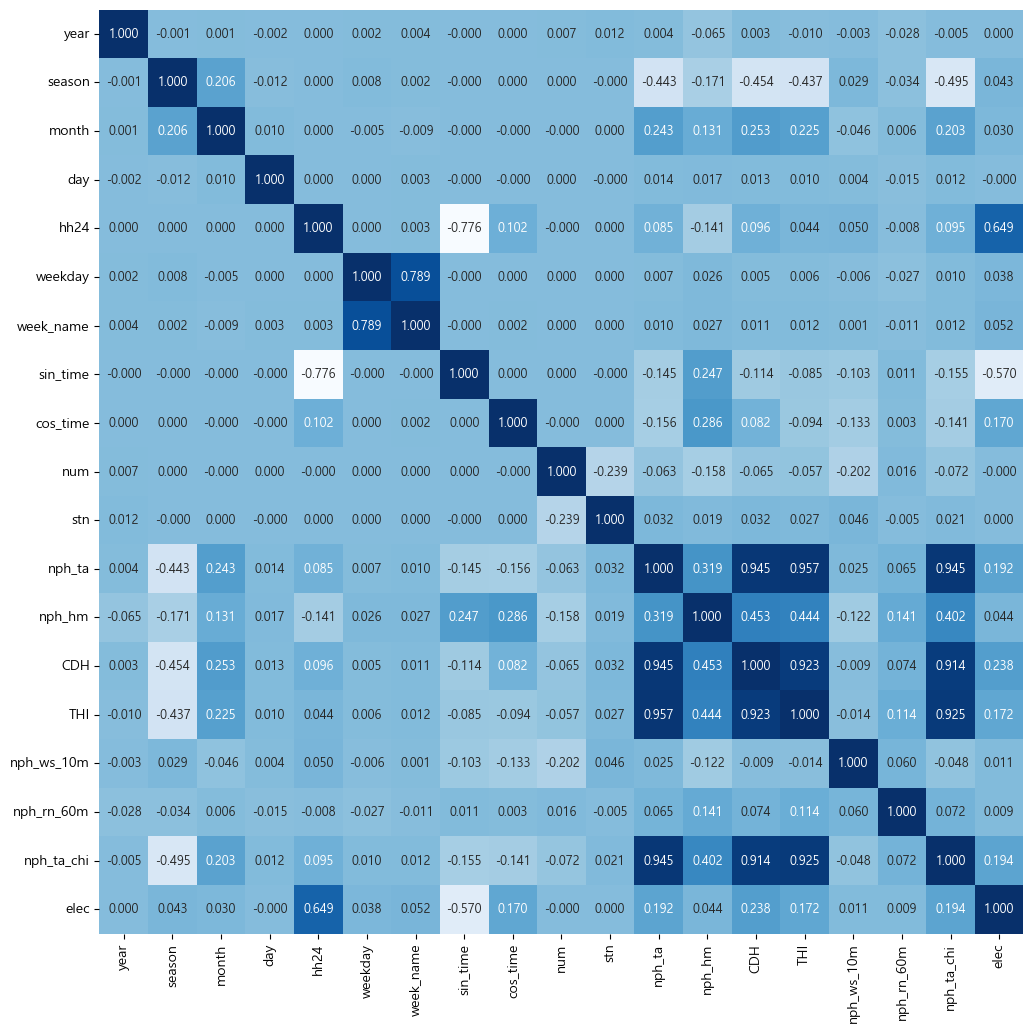

In [50]:
# 상관관계 시각화 
plt.figure(figsize=(12,12))
sns.heatmap(df_train.corr(numeric_only=True),
           annot=True,
           cmap='Blues',
           cbar=False, # 옆에 칼라 바 제거 
           square=True,
            fmt='.3f', # 소수점
            annot_kws={'size':9}
           )    
plt.show()